In [5]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
!kaggle datasets download -d meruvulikith/190k-spam-ham-email-dataset-for-classification

190k-spam-ham-email-dataset-for-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!unzip /content/190k-spam-ham-email-dataset-for-classification.zip

Archive:  /content/190k-spam-ham-email-dataset-for-classification.zip
replace spam_Emails_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [9]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [10]:
df = pd.read_csv("/content/spam_Emails_data.csv")

In [11]:
df

,label,text
0,Spam,viiiiiiagraaaa\nonly for the ones that want to...
1,Ham,got ice thought look az original message ice o...
2,Spam,yo ur wom an ne eds an escapenumber in ch ma n...
3,Spam,start increasing your odds of success & live s...
4,Ham,author jra date escapenumber escapenumber esca...
...,...,...
193847,Ham,on escapenumber escapenumber escapenumber rob ...
193848,Spam,we have everything you need escapelong cialesc...
193849,Ham,hi quick question say i have a date variable i...
193850,Spam,thank you for your loan request which we recie...


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193852 entries, 0 to 193851
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   label   193852 non-null  object
 1   text    193850 non-null  object
dtypes: object(2)
memory usage: 3.0+ MB


In [13]:
# Drop  NUll values

In [14]:
df = df.dropna(axis=0)

In [15]:
df.isna().sum()

label    0
text     0
dtype: int64

In [16]:
df["label"].unique()

array(['Spam', 'Ham'], dtype=object)

In [17]:
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])

<ipython-input-17-2ca8175672ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = encoder.fit_transform(df['label'])


In [18]:
label_count = df['label'].value_counts()

In [19]:
label_count

label
0    102159
1     91691
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x78e01479aad0>,
 [Text(-0.6331332148846506, -0.8995233916968624, 'Spam'),
  Text(0.6331332148846507, 0.8995233916968624, 'Not spam')],
 [Text(-0.34534538993708214, -0.49064912274374306, '52.7%'),
  Text(0.3453453899370822, 0.49064912274374306, '47.3%')])

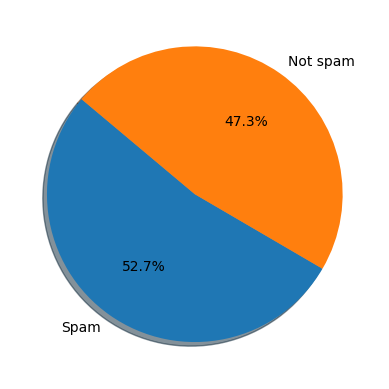

In [20]:
plt.pie(label_count.values, labels=["Spam", "Not spam"], startangle=140, autopct='%1.1f%%', shadow=True)

Text(0.5, 1.0, 'Lable count')

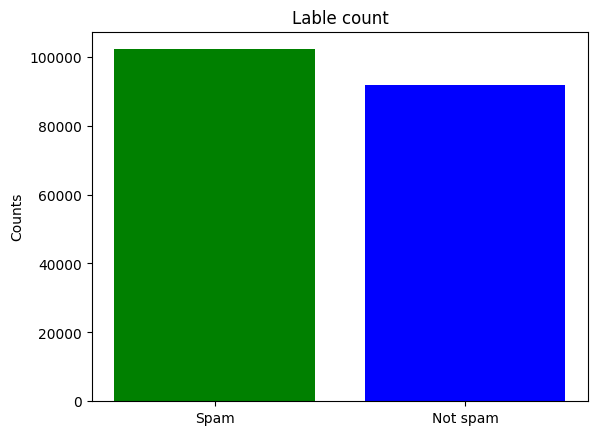

In [21]:
plt.bar(["Spam", "Not spam"], label_count, color=['green', "blue"])
plt.ylabel('Counts')
plt.title('Lable count')

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
X, y = df["text"], df["label"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [25]:
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape (155080,)
X_test shape (38770,)
y_train shape (155080,)
y_test shape (38770,)


In [26]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

In [28]:
mnb = MultinomialNB()
mnb.fit(X_train_vectorized, y_train)

MultinomialNB()

In [29]:
y_pred_mnb = mnb.predict(X_test_vectorized)
mse_mnb = mean_squared_error(y_test, y_pred_mnb)
score_mnb = accuracy_score(y_test, y_pred_mnb)
print(f" MSE = {round(mse_mnb * 100, 2)}%, Score = {round(score_mnb * 100, 2)}%")

 MSE = 3.91%, Score = 96.09%


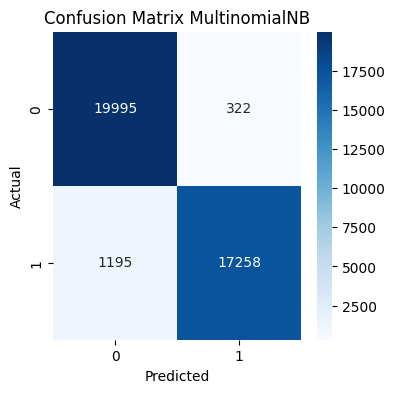

In [30]:
cm_mnb = confusion_matrix(y_test, y_pred_mnb)
plt.figure(figsize=(4, 4))
sb.heatmap(cm_mnb, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f"Confusion Matrix MultinomialNB")
plt.show()

In [31]:
bnb = BernoulliNB()
bnb.fit(X_train_vectorized, y_train)

BernoulliNB()

In [32]:
y_pred_bnb = bnb.predict(X_test_vectorized)
mse_bnb = mean_squared_error(y_test, y_pred_bnb)
score_bnb = accuracy_score(y_test, y_pred_bnb)
print(f" MSE = {round(mse_bnb * 100, 2)}%, Score = {round(score_bnb * 100, 2)}%")

 MSE = 10.99%, Score = 89.01%


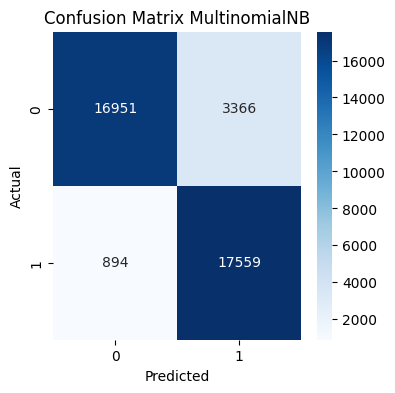

In [33]:
cm_bnb = confusion_matrix(y_test, y_pred_bnb)
plt.figure(figsize=(4, 4))
sb.heatmap(cm_bnb, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f"Confusion Matrix BernoulliNB")
plt.show()

In [34]:
from sklearn.svm import SVC